In [3]:
import random                                        ##importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import math
import imageio
from PIL import Image, ImageDraw, ImageFont

In [4]:
##function to create a square lattice of n X n
def latticecreate(n):
    lattice = np.random.choice(a=[-1,1],size=(n,n))
    return lattice

In [5]:
#Hamiltonian and metropolis algorithm implemented using periodic boundary conditions

def calculateenergy(lattice,n,j,T):
    font = ImageFont.truetype('Pillow/Tests/fonts/FreeMono.ttf', 12)
    image=[]
    l=0
    la=0
    for k in range (0,n*10):
        for l in range (0,n*10):
            x=np.random.randint(0,n)
            y=np.random.randint(0,n)
            
            nb = lattice[(x+1)%n,y] + lattice[x,(y+1)%n] + lattice[(x-1)%n,y] + lattice[x,(y-1)%n]
            
            deltaE=lattice[x,y]*2*nb*j
            p=random.uniform(0,1)
            if deltaE<0:
                lattice[x,y]=lattice[x,y]*(-1)
            else:
                r=math.exp((-deltaE)/(T))
                if p<r:
                    lattice[x,y]=lattice[x,y]*(-1)
                else:
                    lattice[x,y]=lattice[x,y]
            la=la+1
        if l>10:
            lu=str(la)
            im=Image.fromarray(lattice.astype('uint8')).convert('RGBA')
            draw = ImageDraw.Draw(im)
            draw.text((0,0), lu,font=font,fill=(255,0,0,255))
            image.append(im)
            l=0
        l=l+1    
    return lattice,image
                

In [6]:
##Total energy calculator

def calceenergy(config,N):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4

In [19]:
T=1
j=1
n=75

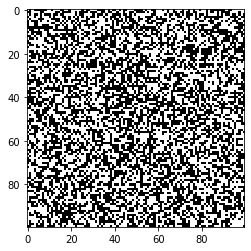

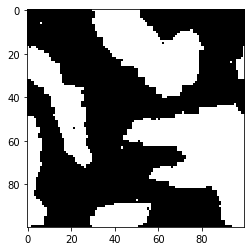

The total energy is ,  -9242.0


In [16]:
#The snippet for one run of the algorithm

lattice=latticecreate(n)
plt.imshow(lattice, cmap="gray")
plt.show()
newlattice,image=calculateenergy(lattice,n,j,T)
plt.imshow(newlattice, cmap="gray")
plt.show()
ef=calceenergy(newlattice,n)
print("The total energy is , ",ef)

In [17]:
#Run the folllowing code to save you GIF
imageio.mimsave('100*100.gif', image)

In [ ]:
#The following snippet is used to plot the relationship between Temeperature and ground state energy
T=0.1
Temp=[]
energy=[]
while T<10:
    lattice=latticecreate(n)
    newlattice,image=calculateenergy(lattice,n,j,T)
    energy.append(calceenergy(newlattice,n))
    Temp.append(T)
    T+=0.2



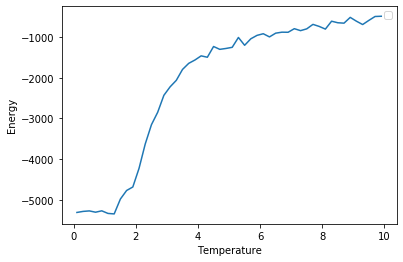

In [21]:
#plot the graph
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.legend('75 x 75')
plt.plot(Temp,energy)